# K Nearest Neighbor using Sklearn Iris Dataset

In [1]:
# Lets import the libraries and load the dataset from sklearn datasets
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# Lets load the data into pandas dataframe and see some of the columns
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# lets scale all the values and put that in X that will be a numpy array
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [5]:
# This is just to convert back the numpy array to pandas df
X = pd.DataFrame(X, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [6]:
# Lets bring the target into y
#y = pd.DataFrame(iris.target, columns=['class'])
#y.head()
y = iris.target

In [7]:
# Lets train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (112, 4)
X_test:  (38, 4)
y_train:  (112,)
y_test:  (38,)


## Model Training for K = 3

In [12]:
# Lets train the model with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_test = knn.predict(X_test)
y_predict_test

array([1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2])

In [33]:
# Lets check the accuracy score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
#print(f1_score(y_test, y_predict_test,average=None))
#print(classification_report(y_test, y_predict_test))
print(accuracy_score(y_test, y_predict_test))
#knn.score(y_test, y_predict_test)

0.9210526315789473


## Model Training for K = 1, 2, 3, ..., 40

In [61]:
import numpy as np
mean_accuracy = np.zeros((39))

for i in range(1, 40):
    knn_mul = KNeighborsClassifier(n_neighbors=i)
    knn_mul.fit(X_train, y_train)
    y_predict_mul = knn_mul.predict(X_test)
    mean_accuracy[i-1] = accuracy_score(y_test, y_predict_mul)
    

mean_accuracy

array([0.92105263, 0.81578947, 0.92105263, 0.89473684, 0.94736842,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.92105263, 0.97368421, 0.97368421, 0.97368421, 0.86842105,
       0.89473684, 0.84210526, 0.86842105, 0.84210526, 0.86842105,
       0.86842105, 0.89473684, 0.84210526, 0.86842105, 0.84210526,
       0.81578947, 0.84210526, 0.81578947, 0.81578947, 0.81578947,
       0.81578947, 0.81578947, 0.84210526, 0.84210526])

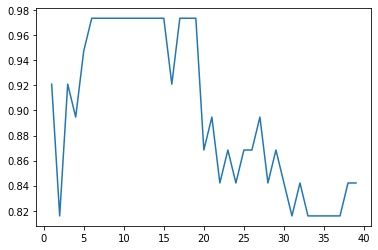

In [62]:
# Lets plot to better understand which value of K gives us max accuracy
from matplotlib import pyplot as plt
plt.plot(range(1, 40), mean_accuracy)

In [69]:
# Lets find out the max values for mean_accuracy axes.
print("Mean_Accuracy: ", max(mean_accuracy))
print("Corresponding K: ", mean_accuracy.argmax()+1)

Mean_Accuracy:  0.9736842105263158
Corresponding K:  6


Since our model is saying 6 would be the most appropriate value of k, lets verify by modelling K = 6

## Model Training for K = 6

In [72]:
# Lets train the model with KNN
from sklearn.neighbors import KNeighborsClassifier
knn_5 = KNeighborsClassifier(n_neighbors=6)
knn_5.fit(X_train, y_train)
y_predict_test_5 = knn_5.predict(X_test)
y_predict_test_5

array([1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2])

In [73]:
# Lets check the accuracy score
print(accuracy_score(y_test, y_predict_test_5))


0.9736842105263158
